<center><h1><strong>Feature Engineering and Preprcessing    </strong></h1></center>

### **Importing Libraries :**

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sys
import os

-  Adding src package path to avoid some errors

In [3]:
src_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
if src_path not in sys.path:
    sys.path.append(src_path)

### **Some Styles** :

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

plt.style.use("seaborn-v0_8")

### **Remove Warning :**

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### **Importing custom modules :**

In [6]:
from preprocessing.FeatureEngineering import Cleaning
from preprocessing.Preprocessing import CustomImputer, CustomTransformer, CustomScaler, CustomEncoder

### **Our data :**

In [7]:
data_path = "../../data/Telco-Customer-Churn.csv"
df = pd.read_csv(data_path)
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### **Previously, we noticed a `skewness` problem with the `TotalCharges` column**

#### **Let's try to fix :**

##### **Cleaning on the column before :**

In [8]:
df_cpy = df.copy()

replacements = {
                  'TotalCharges': {' ': np.nan}
            }
df_cpy = Cleaning.replace_values(df_cpy, replacements=replacements)
imputer = CustomImputer(median_cols=['TotalCharges'])
df_cpy = imputer.fit_transform(df_cpy)
dtype_map = {
              'TotalCharges': 'numeric'
               }
df_cpy = Cleaning.convert_columns_dtype(X=df_cpy, dtype_map=dtype_map)

### **Skewness** :

In [9]:
original = df_cpy['TotalCharges'].copy()

transformer = CustomTransformer(method='yeo-johnson', columns=['TotalCharges'])
transformer.fit(df_cpy)
df_transformed = transformer.transform(df_cpy.copy())

#### **Before transfomation :**

<Axes: xlabel='TotalCharges', ylabel='Density'>

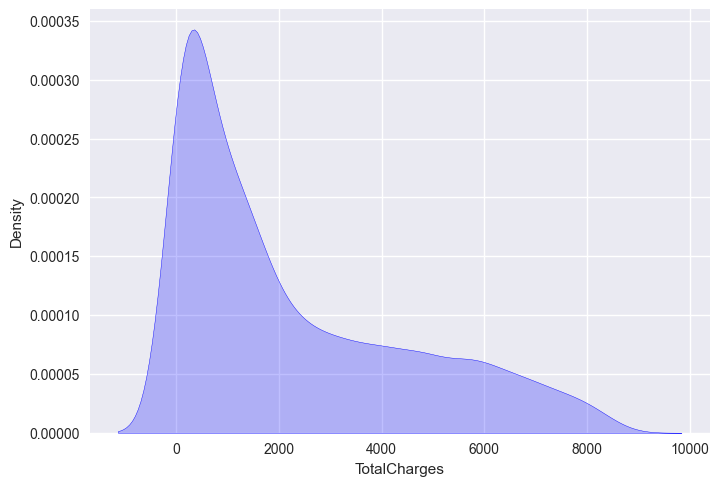

In [10]:
sns.kdeplot(original, fill=True, color='blue')

#### **After transfomation :**

<Axes: xlabel='TotalCharges', ylabel='Density'>

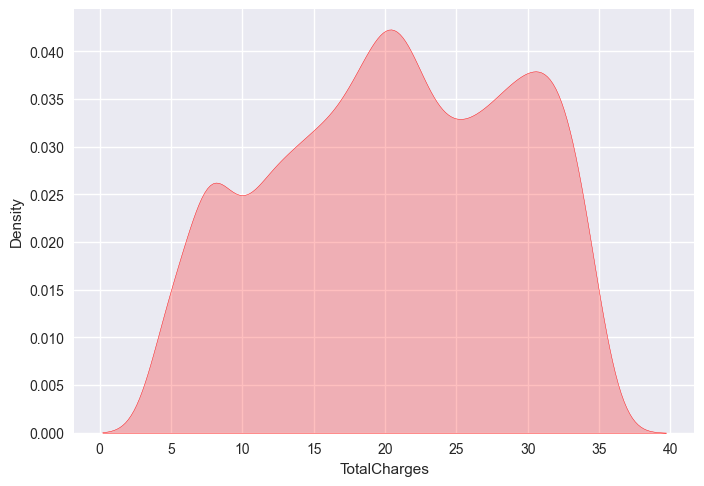

In [11]:
sns.kdeplot(df_transformed['TotalCharges'], fill=True, color='red')

> - #### **I think it's very good looks like a `normal distribution`**
> - #### **Later, I will add this step in my pipeline**

### **Let's see Features Importance** :

#### **Basic preprocessing** :

In [12]:
from sklearn.model_selection import train_test_split

df_copy = df.copy()
x = df_copy.drop(['Churn'],axis=1)
y = df_copy[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()

In [14]:
print(X_train_copy.shape)
print(y_train_copy.shape)

(5634, 20)
(5634, 1)


In [ ]:
X_train_copy = Cleaning.drop_features(X_train_copy, columns=['customerID'])
replacements = {
                  'TotalCharges': {' ': np.nan}
            }
X_train_copy = Cleaning.replace_values(X_train_copy, replacements=replacements)
imputer = CustomImputer(median_cols=['TotalCharges'])
X_train_copy = imputer.fit_transform(X_train_copy)
dtype_map = {
              'TotalCharges': 'numeric'
               }
X_train_copy= Cleaning.convert_columns_dtype(X=X_train_copy, dtype_map=dtype_map)
transformer = CustomTransformer(method='yeo-johnson', columns=['TotalCharges'])
transformer.fit(X_train_copy)
X_train_copy = transformer.transform(X_train_copy)

label_encoded_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
onehot_encoded_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaymentMethod']
scaled_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
        
enc = CustomEncoder(label_cols=label_encoded_features, onehot_cols=onehot_encoded_features)
enc.fit(X_train_copy)
X_train_copy = enc.transform(X_train_copy)
scaler = CustomScaler(scale_cols=scaled_features, scaler_type='standard')
scaler.fit(X_train_copy)
X_train_copy = scaler.transform(X_train_copy)
target_feature = ["Churn"]
target_enc = CustomEncoder(label_cols=target_feature)
target_enc.fit(y_train_copy)
y_train_copy = target_enc.transform(y_train_copy)

In [16]:
X_test_copy = X_test.copy()
y_test_copy = y_test.copy()

In [17]:
print(X_test_copy.shape)
print(y_test_copy.shape)

(1409, 20)
(1409, 1)


In [ ]:
X_test_copy = Cleaning.drop_features(X_test_copy, ['customerID'])

replacements = {
    'TotalCharges': {' ': np.nan}
}
X_test_copy = Cleaning.replace_values(X_test_copy, replacements=replacements)
X_test_copy = imputer.transform(X_test_copy)
X_test_copy = Cleaning.convert_columns_dtype(X=X_test_copy, dtype_map=dtype_map)
X_test_copy = transformer.transform(X_test_copy)
X_test_copy = enc.transform(X_test_copy)
X_test_copy = scaler.transform(X_test_copy)
y_test_copy = target_enc.transform(y_test_copy)


In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_copy, y_train_copy)

importances = clf.feature_importances_
features = X_train_copy.columns

feat_imp = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)

print("Feature Importances (Classifier):")
for feature, importance in feat_imp:
    print(f"{feature.strip()}: {importance:.4f}")

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Feature Importances (Classifier):
TotalCharges: 0.2017
MonthlyCharges: 0.1682
tenure: 0.1666
InternetService_Fiber optic: 0.0381
PaymentMethod_Electronic check: 0.0376
Contract_Two year: 0.0286
gender: 0.0285
PaperlessBilling: 0.0271
OnlineSecurity_Yes: 0.0250
Partner: 0.0240
TechSupport_Yes: 0.0229
Contract_One year: 0.0219
OnlineBackup_Yes: 0.0215
SeniorCitizen: 0.0205
Dependents: 0.0201
MultipleLines_Yes: 0.0201
DeviceProtection_Yes: 0.0189
StreamingMovies_Yes: 0.0180
StreamingTV_Yes: 0.0173
PaymentMethod_Mailed check: 0.0138
PaymentMethod_Credit card (automatic): 0.0135
OnlineSecurity_No internet service: 0.0084
TechSupport_No internet service: 0.0060
StreamingTV_No internet service: 0.0055
OnlineBackup_No internet service: 0.0050
StreamingMovies_No internet service: 0.0046
MultipleLines_No phone service: 0.0044
InternetService_No: 0.0043
PhoneService: 0.0043
DeviceProtection_No internet service: 0.0038


In [21]:
top_features = pd.Series(importances, index=features).sort_values(ascending=False).head(20).index.tolist()
top_features

['TotalCharges',
 'MonthlyCharges',
 'tenure',
 'InternetService_Fiber optic',
 'PaymentMethod_Electronic check',
 'Contract_Two year',
 'gender',
 'PaperlessBilling',
 'OnlineSecurity_Yes',
 'Partner',
 'TechSupport_Yes',
 'Contract_One year',
 'OnlineBackup_Yes',
 'SeniorCitizen',
 'Dependents',
 'MultipleLines_Yes',
 'DeviceProtection_Yes',
 'StreamingMovies_Yes',
 'StreamingTV_Yes',
 'PaymentMethod_Mailed check']

> #### **`Notice :`**
> -  **`The top 3 features` with the highest importance are :**
>> - TotalCharges
>> - tenure
>> - MonthlyCharges
> - #### **I will think in my pipelines to choose for training the model only on the top N important features to `reduce dimensionality` and  improve generalization or to keep them.**

<p>&nbsp;</p>

<p>&nbsp;</p>


<center><h1><strong>Modeling    </strong></h1></center>

### **Baseline :**

In [22]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

base = DummyClassifier(strategy = "most_frequent", constant = 0)
base.fit(X_train_copy, y_train_copy)
y_pred_base = base.predict(X_test_copy)

print(f"Baseline model achieves accuracy = {accuracy_score(y_test_copy, y_pred_base)}")
print("---------------------------------------------------------")
print(f"Baseline model achieves f1 = {f1_score(y_test_copy, y_pred_base)}")
print("---------------------------------------------------------")
print(f"Baseline model achieves roc_auc = {roc_auc_score(y_test_copy, y_pred_base)}")

Baseline model achieves accuracy = 0.7352732434350603
---------------------------------------------------------
Baseline model achieves f1 = 0.0
---------------------------------------------------------
Baseline model achieves roc_auc = 0.5


### **Data Imbalance Problem**

#### **`Let's test different resampling techniques :`**

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline

resampling_methods = {
    'No Sampling': None,
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SMOTEENN': SMOTEENN(random_state=42),
    'RandomUnderSampler': RandomUnderSampler(random_state=42)
}

clf = RandomForestClassifier(random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

In [24]:
for method_name, sampler in resampling_methods.items():
    fold_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

    for train_index, test_index in skf.split(X_train_copy, y_train_copy):  
        X_train, X_test = X_train_copy.iloc[train_index], X_train_copy.iloc[test_index]
        y_train, y_test = y_train_copy.iloc[train_index], y_train_copy.iloc[test_index]
        
        y_train = y_train.values.ravel()
        y_test = y_test.values.ravel()

        if sampler is not None:
            pipeline = Pipeline([('sampler', sampler), ('classifier', clf)])
        else:
            pipeline = Pipeline([('classifier', clf)])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        y_proba = pipeline.predict_proba(X_test)[:, 1]  

        fold_metrics['accuracy'].append(accuracy_score(y_test, y_pred))
        fold_metrics['precision'].append(precision_score(y_test, y_pred))
        fold_metrics['recall'].append(recall_score(y_test, y_pred))
        fold_metrics['f1'].append(f1_score(y_test, y_pred))
        fold_metrics['roc_auc'].append(roc_auc_score(y_test, y_proba))

    results.append({
        'Method': method_name,
        'Accuracy': np.mean(fold_metrics['accuracy']),
        'Precision': np.mean(fold_metrics['precision']),
        'Recall': np.mean(fold_metrics['recall']),
        'F1-score': np.mean(fold_metrics['f1']),
        'ROC-AUC': np.mean(fold_metrics['roc_auc']),
    })

results_df = pd.DataFrame(results).sort_values(by='ROC-AUC', ascending=False)
print("\n------ Cross-Validated Results ------")
print(results_df.round(4))


------ Cross-Validated Results ------
               Method  Accuracy  Precision  Recall  F1-score  ROC-AUC
5            SMOTEENN    0.7375     0.5039  0.7988    0.6177   0.8281
6  RandomUnderSampler    0.7410     0.5087  0.7420    0.6035   0.8202
1   RandomOverSampler    0.7803     0.5893  0.5688    0.5788   0.8170
0         No Sampling    0.7877     0.6339  0.4746    0.5427   0.8168
2               SMOTE    0.7776     0.5806  0.5836    0.5821   0.8145
3              ADASYN    0.7707     0.5652  0.5902    0.5774   0.8119
4     BorderlineSMOTE    0.7726     0.5694  0.5889    0.5789   0.8107


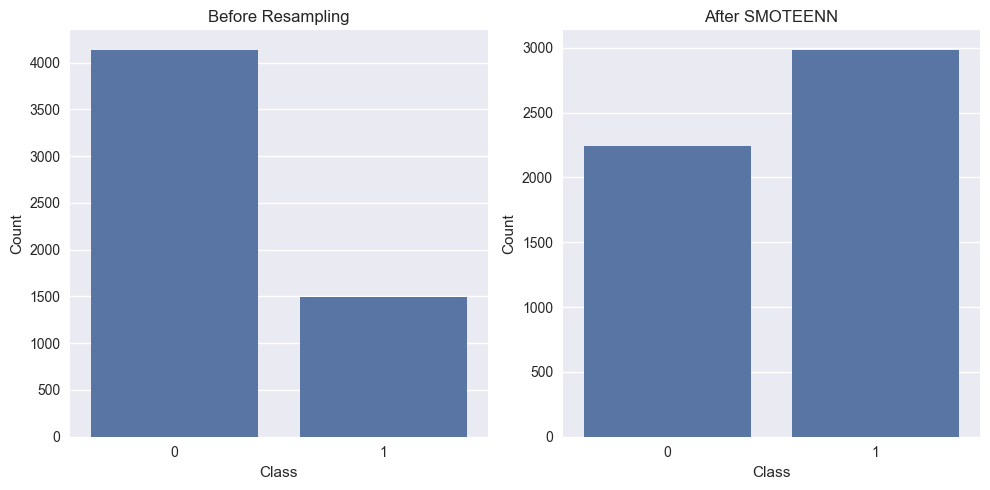

In [25]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train_copy.squeeze())
plt.title("Before Resampling")
plt.xlabel("Class")
plt.ylabel("Count")

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train_copy, y_train_copy.values.ravel())

plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title("After SMOTEENN")
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

> - #### **`SMOTEENN` is our first choice**

### **We can do this also :**
#### **`Equalize the classes :`**

In [26]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_copy, y_train_copy.values.ravel())

print(pd.Series(y_resampled).value_counts())

0    4138
1    4138
Name: count, dtype: int64


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier()
models, predictions = clf.fit(X_resampled, X_test_copy, y_resampled, y_test_copy.values.ravel())
models

  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 4138, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 8276, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
CalibratedClassifierCV,0.77,0.79,0.79,0.78,0.54
LinearDiscriminantAnalysis,0.76,0.78,0.78,0.78,0.18
RidgeClassifierCV,0.76,0.78,0.78,0.78,0.08
RidgeClassifier,0.76,0.78,0.78,0.78,0.07
LinearSVC,0.76,0.78,0.78,0.77,2.11
NuSVC,0.77,0.78,0.78,0.78,8.45
LogisticRegression,0.76,0.78,0.78,0.78,0.17
SVC,0.77,0.78,0.78,0.78,6.14
AdaBoostClassifier,0.76,0.78,0.78,0.77,1.25


> - #### **Nice! better results, I will choose this.**
> - #### **Since data is imbalancd , I will choose models based on  `Average of Balanced Accuracy, ROC AUC, and F1 Score`:**
>> - `CalibratedClassifierCV`

>>- `LinearDiscriminantAnalysis`

>> - `RidgeClassifierCV`

>>- `RidgeClassifier`

>>- `LogisticRegression`

<p>&nbsp;</p>

## **Pipeline Selection :**

In [33]:
from preprocessing.Pipelines import Pipeline1, Pipeline2
from preprocessing.EvaluatePipeline import EvaluatePipeline

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipeline1 = Pipeline1()
pipeline2 = Pipeline2()

X_train1, y_train1 = pipeline1.fit_transform(X_resampled, y_resampled)
X_train2, y_train2 = pipeline2.fit_transform(X_resampled, y_resampled)

In [ ]:
evaluator_pipeline1 = EvaluatePipeline(X_train1, y_train1)
results_pipeline1 = evaluator_pipeline1.evaluate()

In [45]:
results_pipeline1

,accuracy,precision,recall,f1,balanced_accuracy,roc_auc
LogisticRegression,0.80,0.67,0.52,0.58,0.71,0.85
RandomForest,0.79,0.64,0.47,0.54,0.69,0.82
XGBoost,0.78,0.60,0.51,0.55,0.69,0.81
CalibratedClassifierCV,0.80,0.67,0.51,0.58,0.71,0.85
ExtraTrees,0.78,0.61,0.46,0.53,0.68,0.79


In [39]:
evaluator_pipeline2 = EvaluatePipeline(X_train2, y_train2)
results_pipeline2 = evaluator_pipeline2.evaluate()

In [46]:
results_pipeline2

,accuracy,precision,recall,f1,balanced_accuracy,roc_auc
LogisticRegression,0.80,0.66,0.50,0.57,0.70,0.84
RandomForest,0.79,0.63,0.48,0.54,0.69,0.82
XGBoost,0.78,0.61,0.51,0.55,0.69,0.81
CalibratedClassifierCV,0.80,0.67,0.50,0.57,0.70,0.84
ExtraTrees,0.77,0.59,0.46,0.52,0.67,0.79


> - #### **Closer results, I will go with `Piplines 1`,  with resampling data i think all will be better.**


## **Model Selection :**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

target = "Churn"
X = df.drop(columns=[target])
y = df[target]

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
pipeline = Pipeline1()
X_train_transformed, y_train_transformed = pipeline.fit_transform(X_train_raw, y_train_raw)
X_test_transformed, y_test_transformed = pipeline.transform(X_test_raw, y_test_raw)

In [70]:
ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_transformed, y_train_transformed.values.ravel())

In [ ]:
models = {
    'CalibratedClassifierCV': CalibratedClassifierCV(base_estimator=LogisticRegression(max_iter=1000), cv=5),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    'RidgeClassifierCV': RidgeClassifierCV(),
    'RidgeClassifier': RidgeClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [73]:
for name, model in models.items():
    print(f"\n Training and Evaluating: {name}")
    model.fit(X_resampled, y_resampled)

    y_pred = model.predict(X_test_transformed)

    print("\n Classification Report:")
    print(classification_report(y_test_transformed, y_pred))


 Training and Evaluating: CalibratedClassifierCV

 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409


 Training and Evaluating: LinearDiscriminantAnalysis

 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.50      0.81      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409


 Training and Evaluating: RidgeClassifierCV

 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1 

> - #### **Closer results!, but I will go with `Logistic Regression` because it has a good balance and high recall `great for catching churners`.**

<p>&nbsp;</p>

## **Fine Tuning our best model  :**

In [77]:
from sklearn.model_selection import GridSearchCV

In [ ]:
logreg = LogisticRegression(max_iter=10000)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],                
    'penalty': ['l2', 'l1'],                     
    'solver': ['liblinear', 'saga'],             
    'class_weight': [None, 'balanced']           
}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [82]:
grid_search.fit(X_resampled, y_resampled)
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


In [98]:
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test_transformed)

In [99]:
print(classification_report(y_test_transformed, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1035
           1       0.51      0.80      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.81      0.75      0.76      1409



In [110]:
best_estimator.fit(X_resampled, y_resampled)
train_pred = best_estimator.predict(X_resampled)
train_scores = best_estimator.decision_function(X_resampled)

print(f"Accuracy on train set = {accuracy_score(y_resampled, train_pred):.3f}")
print(f"F1 on train set = {f1_score(y_resampled, train_pred):.3f}")
print(f"Auc on train set = {roc_auc_score(y_resampled, train_scores):.3f}")

print("----------------------------------")

test_pred = best_estimator.predict(X_test_transformed)
test_scores = best_estimator.decision_function(X_test_transformed)
print(f"Accuracy on test set = {accuracy_score(y_test_transformed, test_pred):.3f}")
print(f"F1 on test set = {f1_score(y_test_transformed, test_pred):.3f}")
print(f"Auc on test set = {roc_auc_score(y_test_transformed, test_scores):.3f}")

Accuracy on train set = 0.772
F1 on train set = 0.779
Auc on train set = 0.853
----------------------------------
Accuracy on test set = 0.746
F1 on test set = 0.627
Auc on test set = 0.850


### **Save our model :**

In [108]:
import joblib

joblib.dump(best_estimator, '../models/Telco_Churn_Classifier.pkl')

['../models/Telco_Churn_Classifier.pkl']